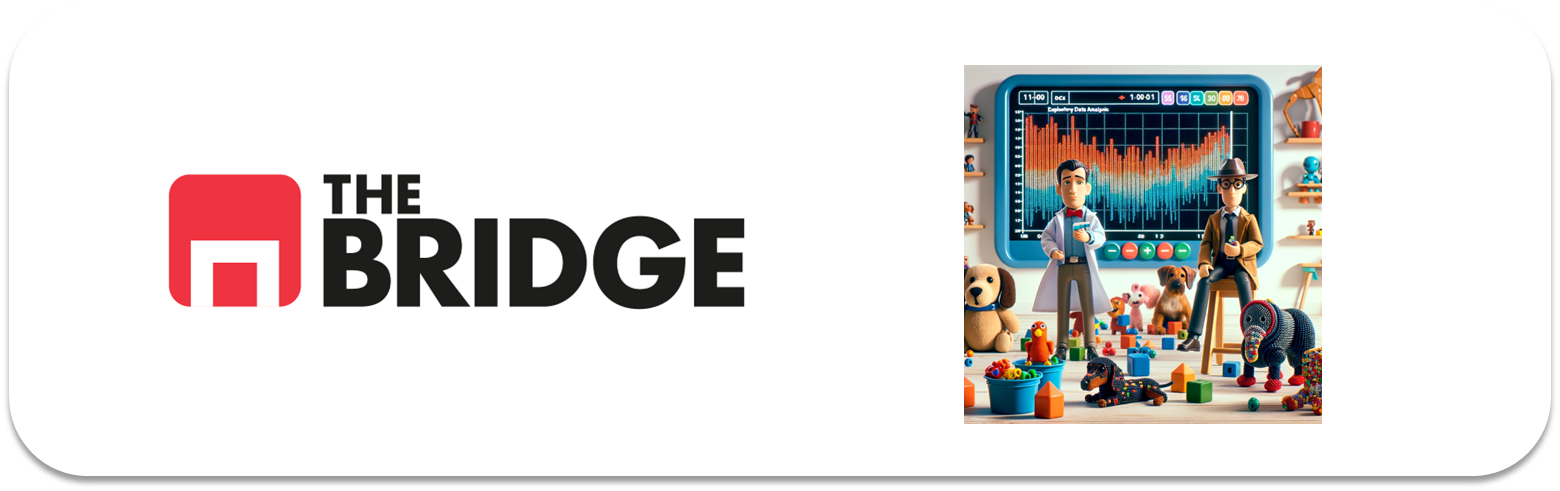

#2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:
1. El titanic fue un accidente con una tasa de mortalidad alta.
2. En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...
3. ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...
4. ... las diferencias de tasas de supervivencia entre mujeres y niños.
5. Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [1]:
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")

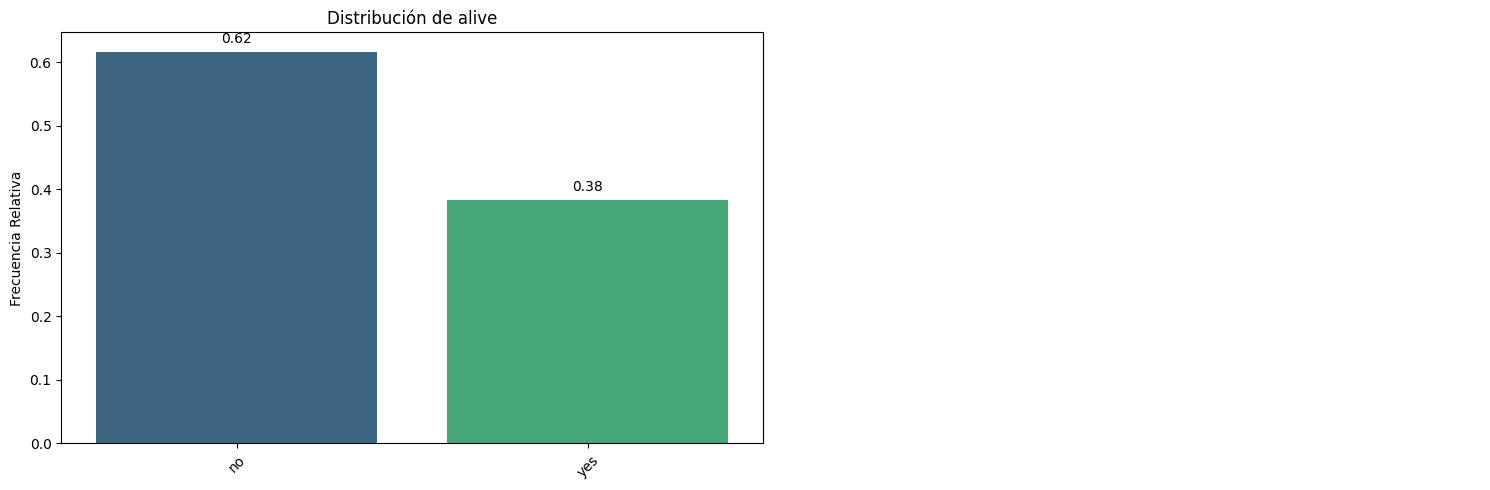

In [4]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

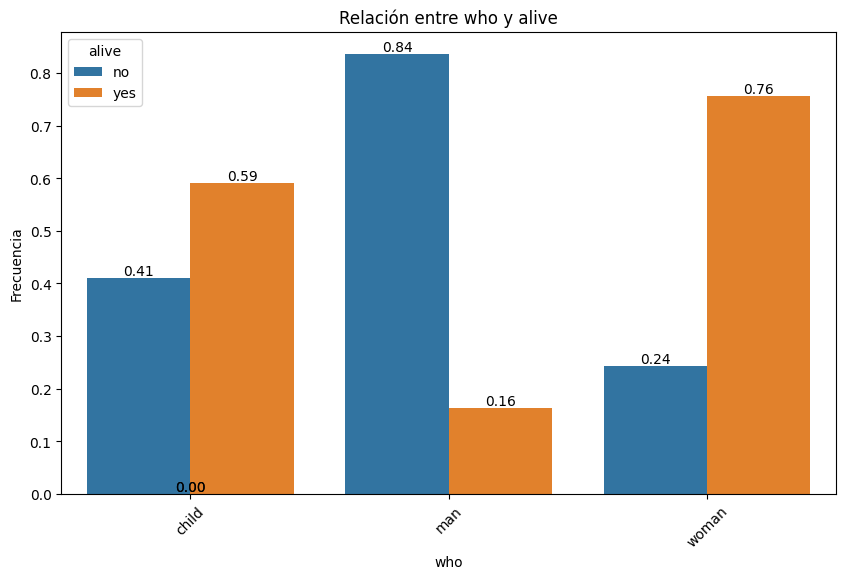

In [61]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq= True, show_values= True)

In [6]:
# Para comparar la relación entre grupo de edad y sexo (variable who) y supervivencia, empleamos el test chi2

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [7]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta Third:


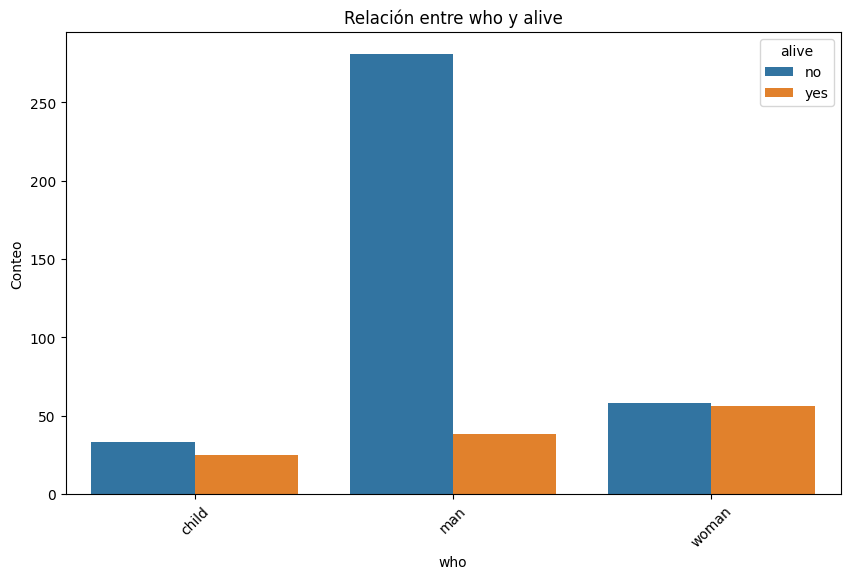

Respuesta First:


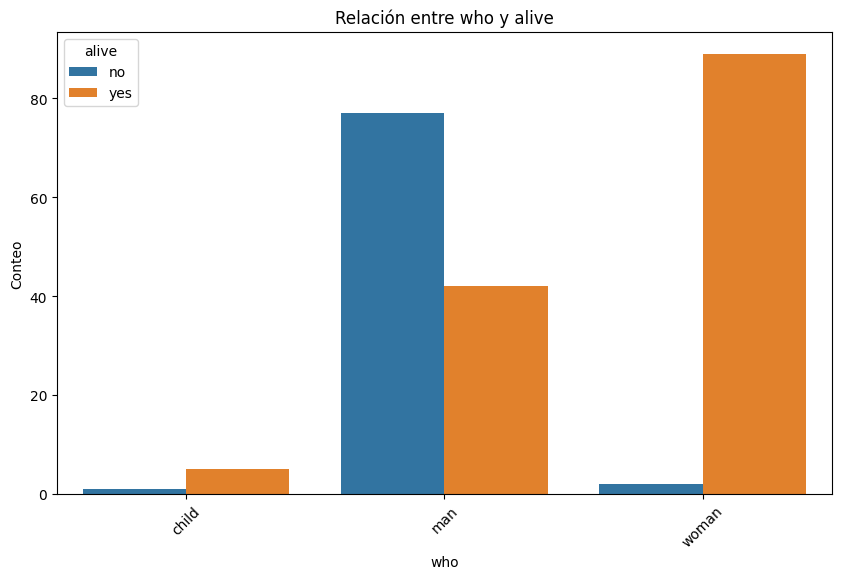

Respuesta Second:


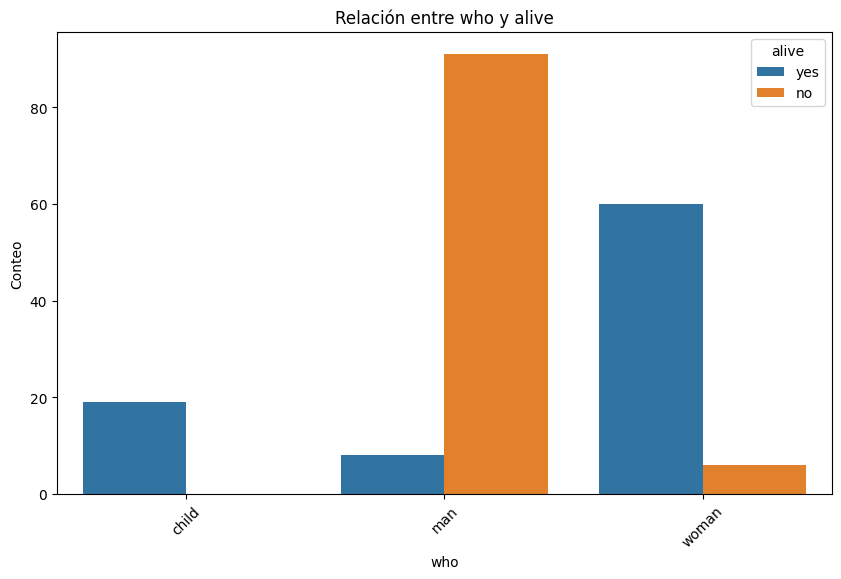

In [8]:
tricategorical_analysis(df_titanic, "class", ["alive","who"])

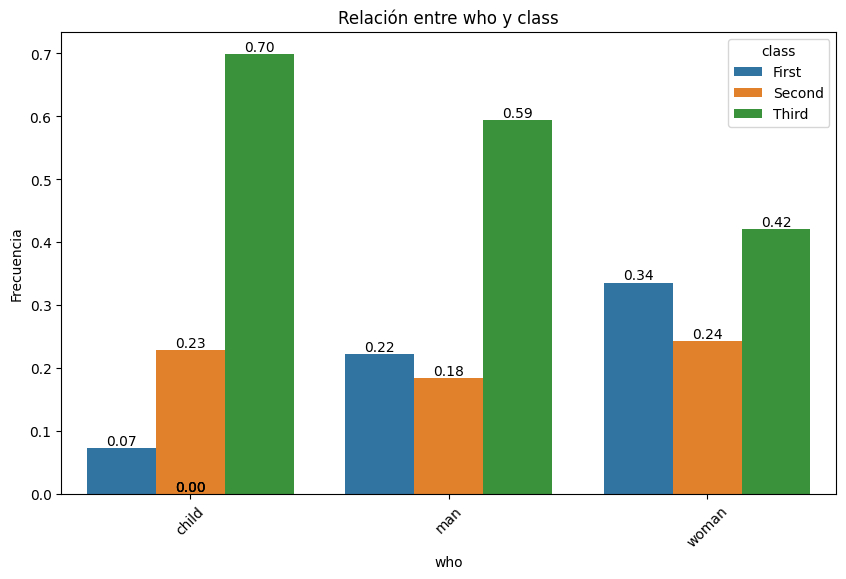

In [9]:
plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= True, show_values= True)

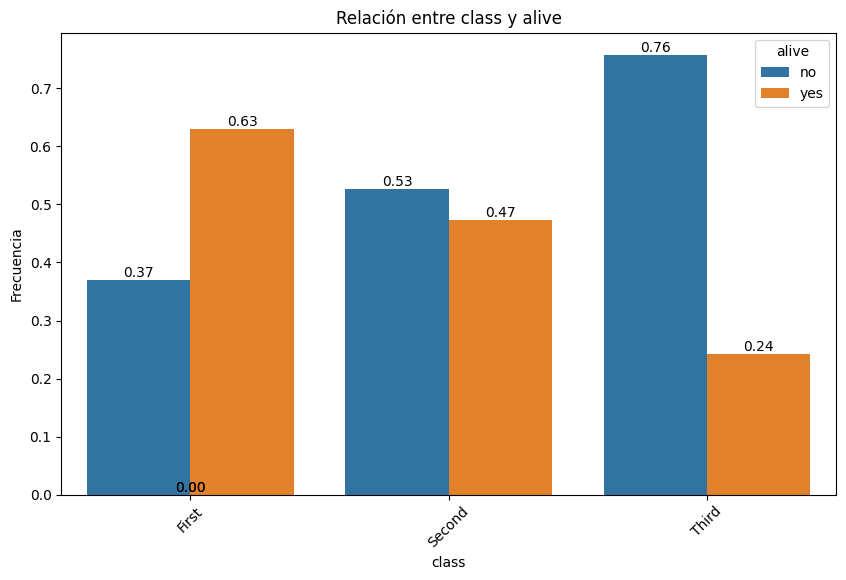

In [10]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq= True, show_values= True)

In [11]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


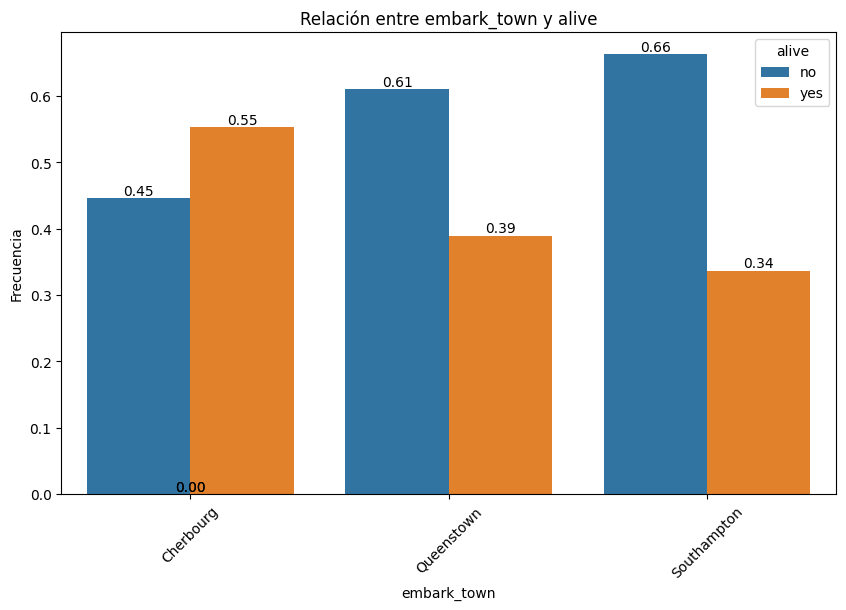

In [13]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True, relative_freq= True)

*Hacemos el test chi-2, para comprobar la confianza estadística:*

In [14]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


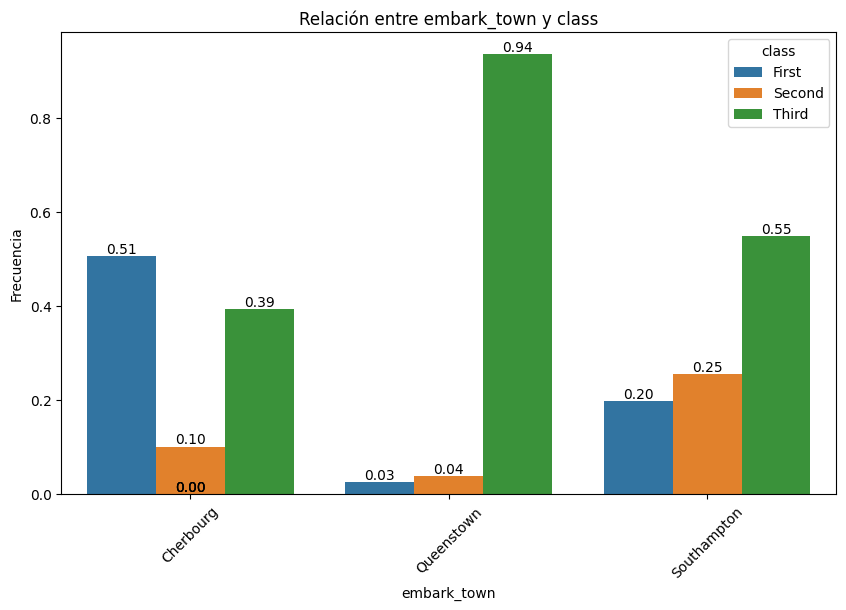

In [15]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", relative_freq= True, show_values= True)

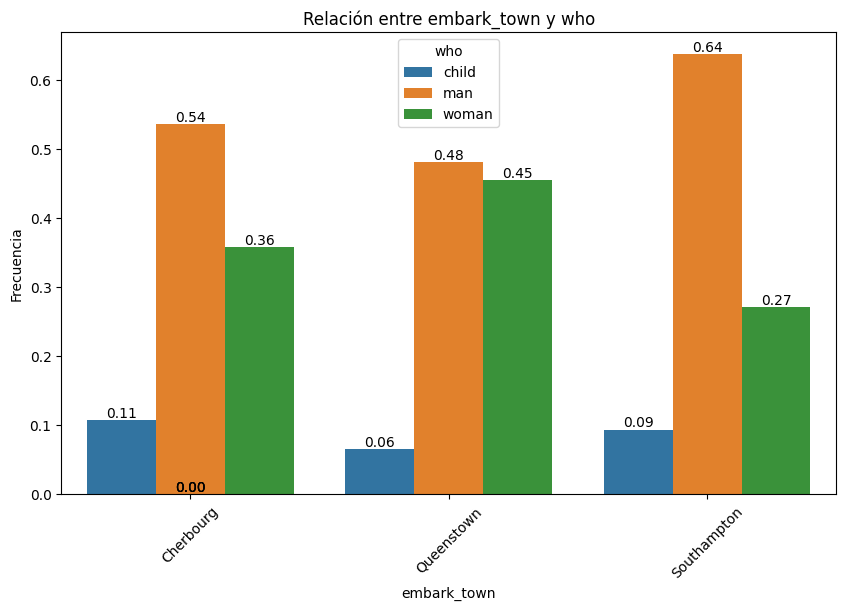

In [16]:
plot_categorical_relationship_fin(df_titanic, "embark_town","who", relative_freq= True, show_values= True)